In [58]:
import warnings
warnings.filterwarnings("ignore")

############################ Standard ############################
# General
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
import re
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline 

current_path = os.path.dirname(os.path.realpath('__file__'))

In [59]:
testing_filepaths = os.listdir(f"{current_path}/../outputs/")
testing_filepaths = [ele for ele in testing_filepaths if 'test_output.txt' in ele]

In [81]:
window_pattern = re.compile("win([0-9]*)")
sg_cbow_pattern = re.compile("sg([0-9]*)")
hs_ns_pattern = re.compile("hs([0-9]*)")
epochs_pattern = re.compile("epochs([0-9]*)")
topic_coherence_pattern = re.compile("Topic coherence is: (-?[0-9].?[0-9]*)")
topic_diversity_pattern = re.compile("Topic diveristy is: (-?[0-9].?[0-9]*)")

results = []
for testing_filepath in testing_filepaths:
    details = {'test_lemma': 0,
               'test_no_stop': 0,
               'test_norm': 1,
               'test_np': 0,
               'test_np_only': 0,
               'train_lemma': 0,
               'train_no_stop': 0,
               'train_norm': 1,
               'train_np': 0,
               'train_np_only': 0,
               'train_type': None,  # word2vec vs fasttext
               'train_window': None,
               'train_sg_cbow': None,
               'train_hs_ns': None,
               'train_epochs': None}
    train_idx_number = testing_filepath.find('train')
    test_data_info = testing_filepath[:train_idx_number-1]
    train_data_info = testing_filepath[train_idx_number+6:]
#     print(test_data_info, train_data_info)
    if 'lemma' in test_data_info:
        details['test_lemma'] = 1
    if 'no_stop' in test_data_info:
        details['test_no_stop'] = 1 
    if 'norm' in test_data_info:
        details['test_norm'] = 1
    if 'np' in test_data_info:
        details['test_np'] = 1
    if ('np' in test_data_info) and ('only' in test_data_info):
        details['test_np_only'] = 1
    if 'lemma' in train_data_info:
        details['train_lemma'] = 1
    if 'no_stop' in train_data_info:
        details['train_no_stop'] = 1 
    if 'norm' in train_data_info:
        details['train_norm'] = 1
    if 'np' in train_data_info:
        details['train_np'] = 1
    if ('np' in train_data_info) and ('only' in train_data_info):
        details['train_np_only'] = 1
    if 'word2vec' in train_data_info:
        details['train_type'] = 1 #'word2vec'
    elif 'fasttext' in train_data_info:
        details['train_type'] = 0 #'fasttext'
    else:
        details['train_type'] = 'other'
    details['train_window'] = int(window_pattern.search(train_data_info).groups()[0])
    if sg_cbow_pattern.search(train_data_info).groups()[0] == '0':
        details['train_sg_cbow'] = 0
    elif sg_cbow_pattern.search(train_data_info).groups()[0] == '1':
        details['train_sg_cbow'] = 1
    else:
        details['train_sg_cbow'] = 'other'
    if hs_ns_pattern.search(train_data_info).groups()[0] == '0':
        details['train_hs_ns'] = 'ns'
    elif hs_ns_pattern.search(train_data_info).groups()[0] == '1':
        details['train_hs_ns'] = 'hs'
    else:
        details['train_hs_ns'] = 'other'
    details['train_epochs'] = int(epochs_pattern.search(train_data_info).groups()[0])
    opened_file = " ".join(open(f"{current_path}/../outputs/{testing_filepath}").readlines())
    try:
        details['topic_coherence'] = float(topic_coherence_pattern.search(opened_file).groups()[0])
    except:
        None
    try:
        details['topic_diversity'] = float(topic_diversity_pattern.search(opened_file).groups()[0])
    except:
        None
    results.append(details)

In [82]:
results = pd.DataFrame(results)
results.to_clipboard()

In [83]:
results

,test_lemma,test_no_stop,test_norm,test_np,test_np_only,train_lemma,train_no_stop,train_norm,train_np,train_np_only,train_type,train_window,train_sg_cbow,train_hs_ns,train_epochs,topic_coherence,topic_diversity
0,0,1,1,1,0,1,1,1,0,0,1,3,0,ns,40,0.164246,0.944
1,0,1,1,1,0,1,1,1,0,0,1,3,0,ns,50,0.183466,0.922
2,0,1,1,1,0,1,1,1,0,0,1,6,0,ns,30,0.157067,0.902
3,0,1,1,1,0,1,1,1,0,0,1,6,0,hs,20,0.166684,0.956
4,0,1,1,1,0,1,1,1,0,0,1,3,0,hs,20,0.144600,0.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,1,0,0,0,1,1,1,0,0,3,0,ns,50,NaN,NaN
595,1,1,1,0,0,0,1,1,1,0,0,3,0,ns,10,0.161029,0.964
596,1,1,1,0,0,1,1,1,1,0,0,3,0,ns,10,0.147737,0.958
597,1,1,1,0,0,1,0,1,1,0,0,9,0,ns,50,-0.327248,0.870


In [84]:
results.columns

Index(['test_lemma', 'test_no_stop', 'test_norm', 'test_np', 'test_np_only', 'train_lemma', 'train_no_stop', 'train_norm', 'train_np', 'train_np_only', 'train_type', 'train_window', 'train_sg_cbow', 'train_hs_ns', 'train_epochs', 'topic_coherence', 'topic_diversity'], dtype='object')

In [85]:
values = 'topic_coherence'
columns = 'train_np'
index = [ele for ele in results.columns if ele not in [values, columns, 'topic_diversity']]
temp_results = results.pivot_table(values=values,
                                   columns=columns,
                                   index=index)
temp_results

train_np                                                                                                                                                                         0         1
test_lemma test_no_stop test_norm test_np test_np_only train_lemma train_no_stop train_norm train_np_only train_type train_window train_sg_cbow train_hs_ns train_epochs                    
0          0            1         0       0            0           0             1          0             0          9            0             ns          10           -0.192768       NaN
                                                                                                                                                            50           -0.513770       NaN
                                                                                                          1          3            0             hs          20            0.128456       NaN
                                                                                                                                                            30            0.132067       NaN
                                                                                                                                                ns          10            0.140814       NaN
...                                                                                                                                                                            ...       ...
1          1            1         1       0            1           1             1          0             1          9            0             ns          10            0.196527  0.187607
                                                                                                                                                            20            0.175129       NaN
                                                                                                                                                            50                 NaN  0.174493
                                                                                                                                  1             hs          10           -0.536657       NaN
                                                                                                                                                ns          10           -0.076293       NaN

[445 rows x 2 columns]

Ttest_relResult(statistic=-4.331624383175104, pvalue=0.0002939990836863141)

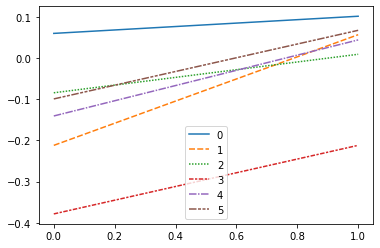

In [104]:
values = 'topic_coherence'
columns = 'train_np'
index = [ele for ele in results.columns if ele not in [values, columns, 'topic_diversity']]
temp_results = results.pivot_table(values=values,
                                   columns=columns,
                                   index=index)
# sns.barplot(x=columns, y='value', data=temp_results.reset_index(drop=True).melt())
sns.lineplot(data=temp_results.dropna().reset_index(drop=True).T.reset_index(drop=True).iloc[:,:6])
ttest_rel(temp_results[0], temp_results[1], nan_policy='omit')

In [87]:
temp_results.dropna()

train_np                                                                                                                                                                         0         1
test_lemma test_no_stop test_norm test_np test_np_only train_lemma train_no_stop train_norm train_np_only train_type train_window train_sg_cbow train_hs_ns train_epochs                    
0          0            1         0       0            1           0             1          0             0          3            0             ns          10            0.059688  0.101322
                                                                                                                                                            50           -0.212111  0.056507
                                                                                                                     9            0             ns          10           -0.084473  0.008986
                                                                                                                                                            50           -0.378540 -0.212059
                                                                   1             1          0             0          3            0             ns          50           -0.140760  0.043857
                                                                                                                     9            0             ns          10           -0.099393  0.067162
                                                                                                                                                            50           -0.120406  0.012906
                                                                                                          1          3            0             ns          10            0.128353  0.121544
                                                                                                                                                            50            0.040243  0.072738
1          1            1         0       0            1           0             1          0             0          3            0             ns          10            0.084120  0.133120
                                                                                                                                                            50           -0.234643  0.050589
                                                                                                                     9            0             ns          10           -0.091837 -0.013550
                                                                                                                                                            50           -0.610671 -0.327248
                                                                   1             1          0             0          3            0             ns          50           -0.307545  0.054074
                                                                                                                     9            0             ns          10           -0.142794  0.086674
                                                                                                                                                            50           -0.662614 -0.150024
                                                                                                          1          3            0             ns          10            0.181969  0.184655
                                                                                                                                                            50            0.167997  0.180172
                                                                                                                     9            0             ns          10            0.188542  0.170488
                               

In [106]:
temp_results.dropna().reset_index(drop=True).to_clipboard()

In [89]:
np.mean(temp_results.dropna().reset_index(drop=True).iloc[:,1] - temp_results.dropna().reset_index(drop=True).iloc[:,0])

0.13169929836408556

In [90]:
temp_results.dropna().mean(axis=0)

train_np
0   -0.077973
1    0.053726
dtype: float64

Ttest_relResult(statistic=-3.24759492798077, pvalue=0.004032789251386132)

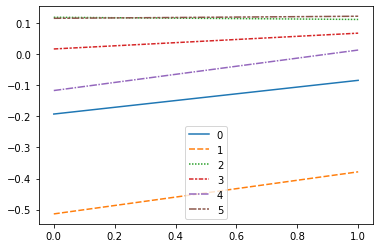

In [91]:
values = 'topic_coherence'
columns = 'train_lemma'
index = [ele for ele in results.columns if ele not in [values, columns, 'topic_diversity']]
temp_results = results.pivot_table(values=values,
                                   columns=columns,
                                   index=index)
# sns.barplot(x=columns, y='value', data=temp_results.reset_index(drop=True).melt())
sns.lineplot(data=temp_results.dropna().reset_index(drop=True).T.reset_index(drop=True).iloc[:,:6])
ttest_rel(temp_results[0], temp_results[1], nan_policy='omit')

Ttest_relResult(statistic=-1.8277000314578746, pvalue=0.09062952987730669)

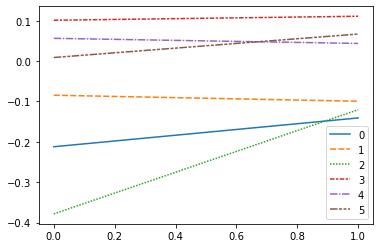

In [92]:
values = 'topic_coherence'
columns = 'train_no_stop'
index = [ele for ele in results.columns if ele not in [values, columns, 'topic_diversity']]
temp_results = results.pivot_table(values=values,
                                   columns=columns,
                                   index=index)
# sns.barplot(x=columns, y='value', data=temp_results.reset_index(drop=True).melt())
sns.lineplot(data=temp_results.dropna().reset_index(drop=True).T.reset_index(drop=True).iloc[:,:6])
ttest_rel(temp_results[0], temp_results[1], nan_policy='omit')

In [93]:
foo = temp_results.dropna()
foo['diff'] = foo[1] - foo[0]
foo.sort_values('diff')

train_no_stop                                                                                                                                                               0         1      diff
test_lemma test_no_stop test_norm test_np test_np_only train_lemma train_norm train_np train_np_only train_type train_window train_sg_cbow train_hs_ns train_epochs                              
1          1            1         0       0            1           1          0        0             0          3            0             ns          50           -0.234643 -0.307545 -0.072901
                                                                                                                9            0             ns          50           -0.610671 -0.662614 -0.051943
                                                                                                                                                       10           -0.091837 -0.142794 -0.050958
0          0            1         0       0            1           1          0        0             0          9            0             ns          10           -0.084473 -0.099393 -0.014920
                                                                              1        0             0          3            0             ns          50            0.056507  0.043857 -0.012649
1          1            1         0       0            1           1          1        0             0          3            0             ns          50            0.050589  0.054074  0.003485
0          0            1         0       0            1           1          1        0             0          3            0             ns          10            0.101322  0.111244  0.009923
1          1            1         0       0            1           1          1        0             0          3            0             ns          10            0.133120  0.147737  0.014616
0          0            1         0       0            1           1          1        0             0          9            0             ns          10            0.008986  0.067162  0.058177
                                                                              0        0             0          3            0             ns          50           -0.212111 -0.140760  0.071351
1          1            1         0       0            1           1          1        0             0          9            0             ns          10           -0.013550  0.086674  0.100224
                                                                                                                                                       50           -0.327248 -0.150024  0.177224
0          0            1         0       0            1           1          1        0             0          9            0             ns          50           -0.212059  0.012906  0.224966
                                                                              0        0             0          9            0             ns          50           -0.378540 -0.120406  0.258134

Ttest_relResult(statistic=-4.2519589847242765, pvalue=0.00035569962733012454)

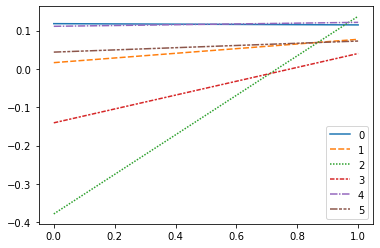

In [94]:
values = 'topic_coherence'
columns = 'train_type'
index = [ele for ele in results.columns if ele not in [values, columns, 'topic_diversity']]
temp_results = results.pivot_table(values=values,
                                   columns=columns,
                                   index=index)
# sns.barplot(x=columns, y='value', data=temp_results.reset_index(drop=True).melt())
sns.lineplot(data=temp_results.dropna().reset_index(drop=True).T.reset_index(drop=True).iloc[:,:6])
ttest_rel(temp_results[0], temp_results[1], nan_policy='omit')

In [95]:
np.mean(temp_results.dropna().reset_index(drop=True).iloc[:,1] - temp_results.dropna().reset_index(drop=True).iloc[:,0])

0.21098927882860333

In [96]:
temp_results.dropna().mean(axis=0)

train_type
0   -0.063255
1    0.147735
dtype: float64

Ttest_relResult(statistic=9.86637984099398, pvalue=6.045529125585561e-16)

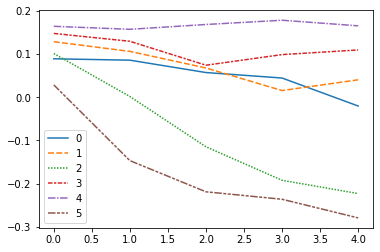

In [110]:
values = 'topic_coherence'
columns = 'train_epochs'
index = [ele for ele in results.columns if ele not in [values, columns, 'topic_diversity']]
temp_results = results.pivot_table(values=values,
                                   columns=columns,
                                   index=index)
# sns.barplot(x=columns, y='value', data=temp_results.reset_index(drop=True).melt())
sns.lineplot(data=temp_results.dropna().reset_index(drop=True).T.reset_index(drop=True).iloc[:,:6])
ttest_rel(temp_results[10], temp_results[50], nan_policy='omit')

In [113]:
temp_results.reset_index(drop=True).to_clipboard()

Ttest_relResult(statistic=22.30414033369023, pvalue=6.630067681349814e-53)

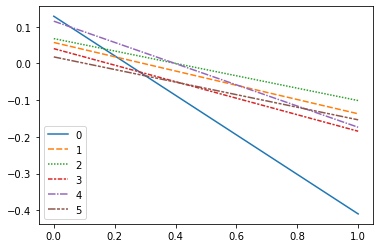

In [107]:
values = 'topic_coherence'
columns = 'train_sg_cbow'
index = [ele for ele in results.columns if ele not in [values, columns, 'topic_diversity']]
temp_results = results.pivot_table(values=values,
                                   columns=columns,
                                   index=index)
# sns.barplot(x=columns, y='value', data=temp_results.reset_index(drop=True).melt())
sns.lineplot(data=temp_results.dropna().reset_index(drop=True).T.reset_index(drop=True).iloc[:,:6])
ttest_rel(temp_results[0], temp_results[1], nan_policy='omit')

In [102]:
np.mean(temp_results.dropna().reset_index(drop=True).iloc[:,1] - temp_results.dropna().reset_index(drop=True).iloc[:,0])

-0.4594710299081036

In [109]:
temp_results.dropna().reset_index(drop=True).to_clipboard()

In [103]:
temp_results.dropna().mean(axis=0)

train_sg_cbow
0    0.116287
1   -0.343184
dtype: float64